<a href="https://colab.research.google.com/github/thanhbrandon/Song-Generator/blob/main/SongGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rush Song Generator
by Thanh Tran

Hello, this purpose of this program is generate Rush Songs using previous Rush Songs.

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
verses = [] # Create Verses String List

#filePath = '/content/drive/MyDrive/Rush Album Lyrics/Permanent Waves/Freewill.txt' # Just Freewill
filePath = '/content/drive/MyDrive/Rush Album Lyrics/All Lyrics.txt' # All lyrics
with open(filePath,encoding='cp1252') as f:
    for line in f:
      #line = line + "newline"
      verses.append(line)

tokenizer = Tokenizer() # Creates Tokenizer 
tokenizer.fit_on_texts(verses) # Converts words into numerical values
word_index = tokenizer.word_index
total_words = len(word_index) + 1

sequences = tokenizer.texts_to_sequences(verses) # Creates sequences using verses and tokenizer

padded = pad_sequences(sequences, padding='post') # Addes padding to sequences to make lengths consistent 

print(word_index)
print(sequences)
print(padded)

print(total_words)

{'the': 1, 'and': 2, 'of': 3, 'to': 4, 'a': 5, 'in': 6, 'i': 7, 'they': 8, 'for': 9, 'we': 10, 'their': 11, 'you': 12, 'on': 13, 'are': 14, 'with': 15, 'will': 16, 'all': 17, 'our': 18, 'us': 19, 'as': 20, 'world': 21, 'can': 22, 'be': 23, 'that': 24, 'heart': 25, 'so': 26, 'your': 27, 'is': 28, 'not': 29, 'but': 30, 'my': 31, 'there': 32, '–': 33, 'just': 34, 'have': 35, 'were': 36, 'can’t': 37, 'each': 38, 'love': 39, 'time': 40, 'at': 41, 'still': 42, 'from': 43, 'eyes': 44, 'by': 45, 'it': 46, 'one': 47, 'some': 48, 'me': 49, 'when': 50, 'man': 51, 'he': 52, 'was': 53, 'who': 54, 'or': 55, 'light': 56, 'into': 57, '—': 58, 'bring': 59, 'life': 60, 'choose': 61, 'too': 62, 'no': 63, 'what': 64, 'things': 65, 'same': 66, 'truth': 67, 'through': 68, 'more': 69, 'way': 70, 'it’s': 71, 'cannot': 72, 'down': 73, 'other': 74, 'alone': 75, 'like': 76, 'him': 77, 'out': 78, 'within': 79, 'different': 80, 'see': 81, 'hearts': 82, 'tide': 83, 'these': 84, 'find': 85, 'closer': 86, 'had': 87, 

In [3]:

input_sequences = []
# Adds verses from file into list




for line in verses:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(verses[0])

Begin the day



In [4]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))



xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


68/68 [==============================] - 9s 28ms/step - loss: 6.5500 - accuracy: 0.0675
Epoch 2/100
68/68 [==============================] - 2s 28ms/step - loss: 5.7984 - accuracy: 0.0829
Epoch 3/100
68/68 [==============================] - 2s 29ms/step - loss: 5.0904 - accuracy: 0.1145
Epoch 4/100
68/68 [==============================] - 2s 29ms/step - loss: 4.1737 - accuracy: 0.1820
Epoch 5/100
68/68 [==============================] - 2s 28ms/step - loss: 3.0825 - accuracy: 0.3277
Epoch 6/100
68/68 [==============================] - 2s 29ms/step - loss: 2.1677 - accuracy: 0.4856
Epoch 7/100
68/68 [==============================] - 4s 53ms/step - loss: 1.5224 - accuracy: 0.6257
Epoch 8/100
68/68 [==============================] - 2s 31ms/step - loss: 1.1359 - accuracy: 0.7309
Epoch 9/100
68/68 [==============================] - 2s 29ms/step - loss: 0.9267 - accuracy: 0.7668
Epoch 10/100
68/68 [==============================] - 2s 29ms/step - loss: 0.7990 - accuracy: 0.7928
Epoch 11/10

In [6]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

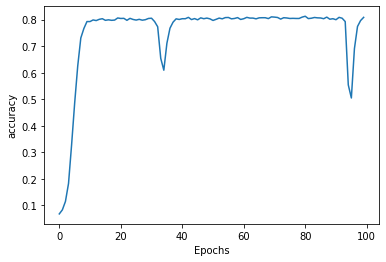

In [7]:
plot_graphs(history, 'accuracy')

In [10]:
#seed_text = "I've got a bad feeling about this"
seed_text = "In the constellation of Orion"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
	if (seed_text == "newline"):
		seed_text = "\n"
print(seed_text)

In the constellation of Orion cygnus fearsome force clear high come along with high lyra high unknown me mood comfort why the sphere a clue me clue me proof kind too mighty mighty – life to clue me river wealth retreats reality had need to chance further gone wrong do goal the only world they’re silent silent mood think that life – do wrong had space lost… sadness view old into the way world xanadu wisdom come to high law land slay the reason clue – motivation me reality mighty threads another mighty life me love was way retreats free do art hungry hungry united
